### Load and encode the IMDB data:

In [1]:
from keras.datasets import imdb
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
import numpy as np
# Basic word encoding - each word in dictionary (10000 words long) given an integer 0-9999. 
# The phrases are then made into 10000 element vectors, with a 1 in indices of a present word, and 0 for absent words.
def encode_input(data,dictionary=10000): # dimension = 'num_words'
    encoded = np.zeros((len(data),dictionary))
    for i,inp in enumerate(data):
        assert max(inp) < dictionary, 'Dimension too small.'
        encoded[i,inp] = 1
    return encoded

In [3]:
x_train = encode_input(train_data)
y_train = np.asarray(train_labels).astype('float32')
x_test = encode_input(test_data)
y_test = np.asarray(test_labels).astype('float32')

### Building the deep FNN network:

In [4]:
# Sequential form:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

'''The final layer here returns a probability of being positive (>=0.5) or negative (<0.5).
Binary cross entropy is a good cost function for 1-neuron, 2-option these probability cases.'''

'The final layer here returns a probability of being positive (>=0.5) or negative (<0.5).\nBinary cross entropy is a good cost function for 1-neuron, 2-option these probability cases.'

In [5]:
# (alternative) Functional API form:
from keras import layers
from keras import models

input_tensor = layers.Input(shape=(10000,))
h1 = layers.Dense(16,activation='relu')(input_tensor)
h2 = layers.Dense(16,activation='relu')(h1)
output_tensor = layers.Dense(1,activation='sigmoid')(h2)

model = models.Model(inputs=input_tensor,outputs=output_tensor)

In [6]:
# Compile the model:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Run the deep FNN on the data:

In [7]:
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
x_validation = x_train[:10000]
y_validation = y_train[:10000]

# Note that the inputs/outputs are TENSORS, and not a list of vectors to iterate over!!
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    validation_data=(x_validation,y_validation))

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5116 - accuracy: 0.8036 - val_loss: 0.3889 - val_accuracy: 0.8730
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3080 - accuracy: 0.9067 - val_loss: 0.3084 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2280 - accuracy: 0.9263 - val_loss: 0.2863 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1818 - accuracy: 0.9405 - val_loss: 0.2738 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1478 - accuracy: 0.9533 - val_loss: 0.2835 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1197 - accuracy: 0.9644 - val_loss: 0.2937 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1033 - accuracy: 0.9681 - val_loss: 0.3059 - val_accuracy: 0.8838
Epoch 8/20
30

### View the history/performance of the model:

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

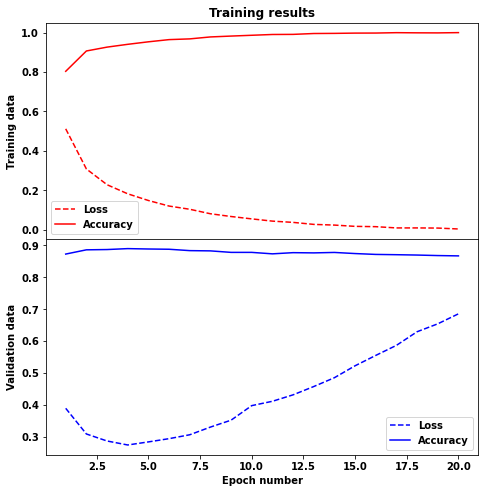

In [9]:
import matplotlib.pyplot as plt

validation_loss = history_dict['val_loss']
validation_accuracy = history_dict['val_accuracy']
training_loss = history_dict['loss']
training_accuracy = history_dict['accuracy']

epochs = np.arange(1,len(training_loss)+1)
fig = plt.figure()
fig.add_axes((0,0,1,0.75))
plt.plot(epochs,training_loss,'r--',label='Loss')
plt.plot(epochs,training_accuracy,'r',label='Accuracy')
plt.ylabel('Training data')
plt.legend()
plt.title('Training results')
fig.add_axes((0,-0.75,1,0.75))
plt.plot(epochs,validation_loss,'b--',label='Loss')
plt.plot(epochs,validation_accuracy,'b',label='Accuracy')
plt.ylabel('Validation data')
plt.legend()
plt.xlabel('Epoch number')
plt.show()

Here the training accuracy increases with every epoch, as is expected. However, after 4 or so epochs, the model starts $\textit{overfitting}$, and the validation set (treated the same as a test set, juts with know results), is less well predicted by the model.

### Using the model to predict from new data:

In [10]:
test_results = model.predict(x_test)

count = 0
for i,result in enumerate(test_results):
    assert abs(result) <= 1, r'Result must be a probability $0\leq y\leq 1$'
    if result >= 0.5:
        result = 1
    else:
        result = 0
    if result == y_test[i]:
        count += 1
    else:
        count = count
print('Number correctly identified: {0}/{1} = {2:.2f}%'.format(count,len(test_results),100*count/len(test_results)))

Number correctly identified: 21313/25000 = 85.25%
